In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1 - Bond Valuation
Take the following: 

Face value = 100 

Coupon rate and frequency - 5% and semiannual

Time to maturity - 5 years

Risk-free rate 4% (this is a flat risk-free rate)

Code a **function** that takes the inputs above and returns the present value of the bond. Then output the PV of the bond. 

Please use **continuous compounding**.

In [ ]:
def bond_present_value(face_value, coupon_rate, coupon_frequency, time_to_maturity, risk_free_rate=0.04):
    """
    To calculate the present value of a bond

    --------------Parameters--------------
    face_value:        Bond's face/par value (e.g., 1000)
    coupon_rate:       Annual coupon rate in % (e.g., 5 for 5%)
    coupon_frequency:  Number of coupon payments per year (e.g., 2 for semiannual)
    time_to_maturity:  Years until maturity
    risk_free_rate:    Annual discount rate (default = 4% = 0.04)
    """

    # Convert coupon rate % to decimal
    coupon_rate = coupon_rate / 100  
    
    # Coupon payment per period
    coupon_payment = face_value * coupon_rate / coupon_frequency  
    
    # Total number of coupon payments
    total_periods = int(time_to_maturity * coupon_frequency)  
    
    # Periodic discount rate
    r = risk_free_rate / coupon_frequency  

    # Present value of coupons
    pv_coupons = sum(coupon_payment * np.exp(-r * t) for t in range(1, total_periods + 1))
    
    # Present value of face value
    pv_face = face_value * np.exp(-risk_free_rate * time_to_maturity)

    return pv_coupons + pv_face

In [3]:
face_value = 100
coupon_rate = 5   # 5%
coupon_frequency = 2  # semiannual
time_to_maturity = 5  # years
risk_free_rate = 0.04  # 4%

print(f"The present value of the bond is: ${bond_present_value(face_value, coupon_rate, coupon_frequency, time_to_maturity, risk_free_rate):.2f}")

The present value of the bond is: $104.31


# Part 2 - Accrued Interest Calculation

Calculate the accrued interest on each day between the first and second coupon payment. Then graph these accrued interests between the two dates. 
Write a litte excerpt on what you've observed (one line should be good)! Use the *30/360* daycount convention and remember we are operating at a semiannual basis.

Assume a period of 180 days (360/2) between coupon payments for simplicity! 

Before writing the code think about what you expect the graph to look like (your first instinct is likely correct)

     Day  Accrued Interest
0      1          0.013889
1      2          0.027778
2      3          0.041667
3      4          0.055556
4      5          0.069444
..   ...               ...
175  176          2.444444
176  177          2.458333
177  178          2.472222
178  179          2.486111
179  180          2.500000

[180 rows x 2 columns]


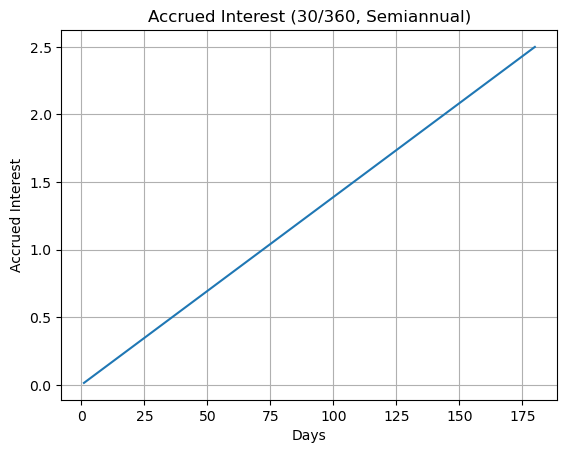

In [4]:
# Parameters
face_value = 100
coupon_rate = 5       # annual % coupon
frequency = 2         # semiannual
days_in_period = 180  # 30/360 assumption

# Coupon per period
coupon_per_period = face_value * (coupon_rate / 100) / frequency

# Days
days = np.arange(1, days_in_period+1)

# Accrued interest under 30/360
accrued_interest = coupon_per_period * (days / days_in_period)

# Put into DataFrame
df = pd.DataFrame({
    "Day": days,
    "Accrued Interest": accrued_interest
})

print(df) 

# Plot
plt.plot(df["Day"], df["Accrued Interest"])
plt.title("Accrued Interest (30/360, Semiannual)")
plt.xlabel("Days")
plt.ylabel("Accrued Interest")
plt.grid(True)
plt.show()


### My Observations
The accrued interest increases linearly between coupon payment dates, growing steadily until it reaches the full coupon amount. This straight-line growth is exactly what is expected under the 30/360 convention with a fixed 180-day period.

# Part 3 - Duration and Graph

The purpose of this exercise is to build some intuition in you about the duration and convexity of a bond. 

You will first calculate the bond duration at inception. Then you will chart the **bond price vs yield graph**, where the yield $\gamma$ takes the range of 0 bps to 1500 bps (this range is just so we can actually see the effect more).

Use the Macaulay duration as mentioned in the class. 

Ouput the initial bond duration, then chart the graph. 

In [5]:
def macaulay_duration(face_value, coupon_rate, coupon_frequency, time_to_maturity, yield_to_maturity):
    """
    To calculate Macaulay duration (in YEARS) at a given yield
    
    --------------Parameters--------------
    - face_value:        e.g., 100 or 1000
    - coupon_rate:       Annual coupon rate in % (e.g., 5 for 5%)
    - coupon_frequency:  Coupons per year (e.g., 2 for semiannual)
    - time_to_maturity:  Years to maturity (e.g., 5)
    - yield_to_maturity: Annual yield as a DECIMAL (e.g., 0.05 for 5%)

    """

    coupon_rate_decimal = coupon_rate / 100.0
    coupon_payment = face_value * coupon_rate_decimal / coupon_frequency
    total_periods = int(time_to_maturity * coupon_frequency)

    # Price using earlier defined function
    price = bond_present_value(
        face_value       = face_value,
        coupon_rate      = coupon_rate,                
        coupon_frequency = coupon_frequency,
        time_to_maturity = time_to_maturity,
        risk_free_rate   = yield_to_maturity        
    )

    # Time-weighted PV sum
    weighted_sum = 0.0 
    for t in range(1, total_periods + 1):
        t_i = t / coupon_frequency              # 0.5, 1.0, 1.5, ...
        cash_flow = coupon_payment if t < total_periods else (coupon_payment + face_value)
        pv = cash_flow * np.exp(-yield_to_maturity * t_i)  # continuous discount
        weighted_sum += t_i * pv

    print(f'Weighted sum of Cash Flows = ${weighted_sum:.2f}')

    duration_in_periods = weighted_sum / price

    return price, duration_in_periods

Weighted sum of Cash Flows = $469.21
Present value of the bond = $104.31
Bond Duration (years) at YTM = 4.00%: 4.50


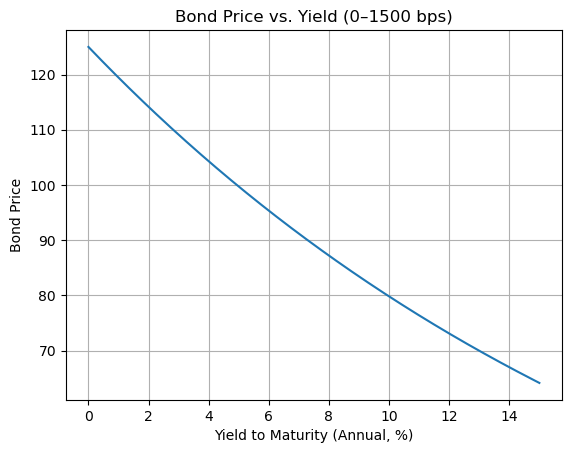

In [6]:
face_value = 100
coupon_rate = 5              # % annual coupon
coupon_frequency = 2         # semiannual
time_to_maturity = 5         # years
yield_to_maturity = 0.04     # 5% annual yield for duration at inception

# 1. Macaulay duration at inception
bond_pv, bond_duration = macaulay_duration(
    face_value, coupon_rate, coupon_frequency, time_to_maturity, yield_to_maturity
)
print(f'Present value of the bond = ${bond_pv:.2f}')
print(f"Bond Duration (years) at YTM = {yield_to_maturity*100:.2f}%: {bond_duration:.2f}")

# 2. Price–Yield curve from 0 to 1500 bps (0% to 15%)
yield_values = np.linspace(0.00, 0.15, 301)  # 0.05% steps
prices = [
    bond_present_value(
        face_value       = face_value,
        coupon_rate      = coupon_rate,
        coupon_frequency = coupon_frequency,
        time_to_maturity = time_to_maturity,
        risk_free_rate   = y)
    for y in yield_values
]

plt.figure()
plt.plot(yield_values * 100, prices)
plt.title("Bond Price vs. Yield (0–1500 bps)")
plt.xlabel("Yield to Maturity (Annual, %)")
plt.ylabel("Bond Price")
plt.grid(True)
plt.show()

Please write a couple lines about what you have observed the graph, does it match your expecations? If not, why not?

### Yes, the graph does match my expectations. 

A bond’s price is the PV of fixed cash flows. 

If the yield/discount rate **falls**, each discount factor gets **larger**, so every cash flow is worth **more today** ⇒ **bond price rises**.  
Formally, the slope is negative. 

Cash flows are fixed. When market yields **drop**, new bonds are issued with **lower coupons**. Existing bonds with **higher coupons** become more attractive, so investors **bid up their prices** until the bonds’ yields align with the new market level. When yields **rise**, the reverse happens, so prices fall.

**Convexity:**  
The price–yield curve is **downward-sloping and convex**.
Positive convexity means price rises **more** for a given yield drop than it falls for the same yield rise.